In [1]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 ━━━━━━━━━━━━━━━━━━━━ 199s 1us/step


Model: "efficientnetv2-m"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 480, 480,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 480, 480,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 240, 240,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 240, 240,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 240, 240,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 240, 240,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 240, 240,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 240, 240,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 240, 240,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 240, 240,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 240, 240,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 240, 240,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, 240, 240,  │      5,184 │ block1b_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, 240, 240,  │         96 │ block1c_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, 240, 240,  │          0 │ block1c_project_

 Total params: 54,431,388 (207.64 MB)

 Trainable params: 54,139,356 (206.53 MB)

 Non-trainable params: 292,032 (1.11 MB)

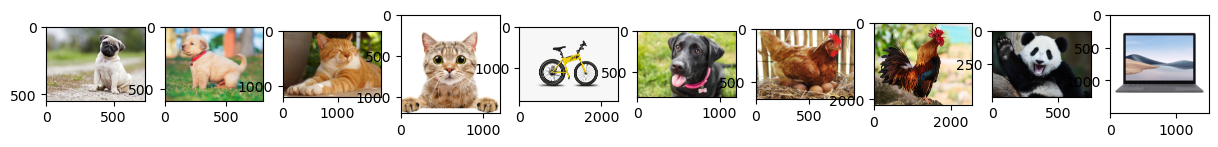

(10, 480, 480, 3)


In [8]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d")
urls.append("https://media.wired.com/photos/61afb905d184762c75e00411/master/pass/Gear-Jackbrabbit-Bike-Yellow-top.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")
urls.append("https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000492607142-e1567357146264.jpg")
urls.append("https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg")
urls.append("https://m.media-amazon.com/images/I/81KoSSAwH2L._SL1500_.jpg")


imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [9]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Panda")
  elif(np.argmax(yh[i]) == 671):
      print("Sepeda") 
  else:
      print("Lainya")

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Anjing
Anjing
Kucing
Kucing
Sepeda
Anjing
Ayam
Ayam
Panda
Lainya
